Telco churn Analysis

Dataset info:Sample Data set containing Telco customer data and showing customers left last month

In [3]:
# import the required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# *Load the data file*

In [4]:
telco_base_data=pd.read_csv("E:/b.ana/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Look at the top 5 records of data

In [5]:
telco_base_data.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [6]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


check the various attributes of data shape (rows and cols),Columns,datatypes

In [7]:
telco_base_data.shape

(7043, 21)

In [8]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
telco_base_data.SeniorCitizen

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [11]:
telco_base_data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
telco_base_data.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [13]:
# check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


 SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

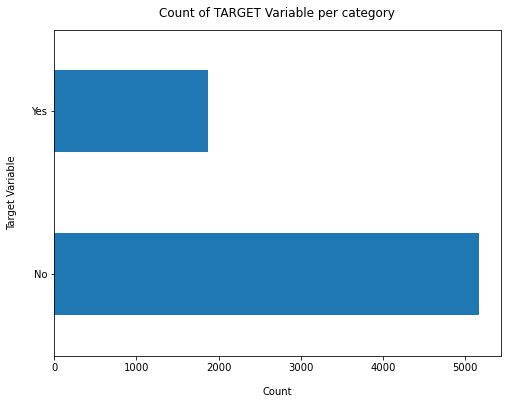

In [14]:
telco_base_data['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [15]:
telco_base_data.Churn.value_counts()
# 73% custombers are active
#27%  custombers have left the company

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [17]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

 . Data is highly imbalanced,ratio=73.27
.So we analyse the data with other features while taking the values separately to get some insights.

In [19]:
#Concise Summary of the dataframe ,as we have too many columns,we are using the verbose=True mode
telco_base_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
telco_base_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
telco_base_data.shape[0]

7043

In [23]:
telco_base_data.shape

(7043, 21)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


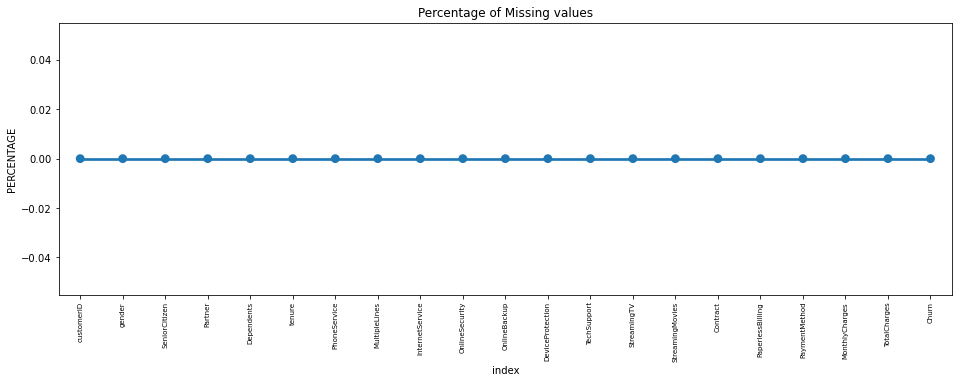

In [24]:
missing=pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

 Missing Data-Initial Intuition
 
.Here we don't have missing data.
.General Thumb Rules:
.For features with less missing values-can use regression to predict the missing values or fill with the mean of the values
present,depending on the feature.
For features with very number of missing values-it is better to drop those columns as they give very less insight on
analysis.
.As there's no thumb rule on what criteria do we delete the columns with high number of missing values,but generally you
can delete the columns,if you have more than 30-40% of missing values.But again there's a catch here ,for example,
Is_car& car_Type,People having no cars,will obviously have cars_Type as NaN(null),
but that doesn't make this columns useless,so decisions has to be taken wisely.

# Data Cleaning

1.create a copy of base data for manipulation & processing

In [25]:
telco_data=telco_base_data.copy()

In [26]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2.Total Charge should be numeric amount.Let's convert it to numerical data type

In [27]:
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [29]:
telco_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3.As we can see there are 11 missing values in total charges column.Let's check these records.

In [30]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# 4. Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [31]:
telco_data.shape

(7043, 21)

In [32]:
# Removing missing values
telco_data.dropna(how='any',inplace=True)
# telco _data.filena(0)

In [33]:
telco_data.shape

(7032, 21)

In [34]:
telco_data.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:>

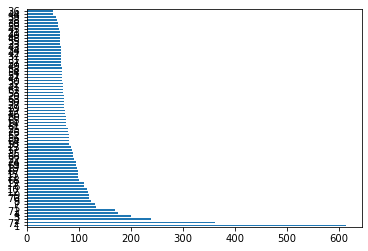

In [35]:
telco_data.tenure.value_counts().plot(kind='barh')

<AxesSubplot:>

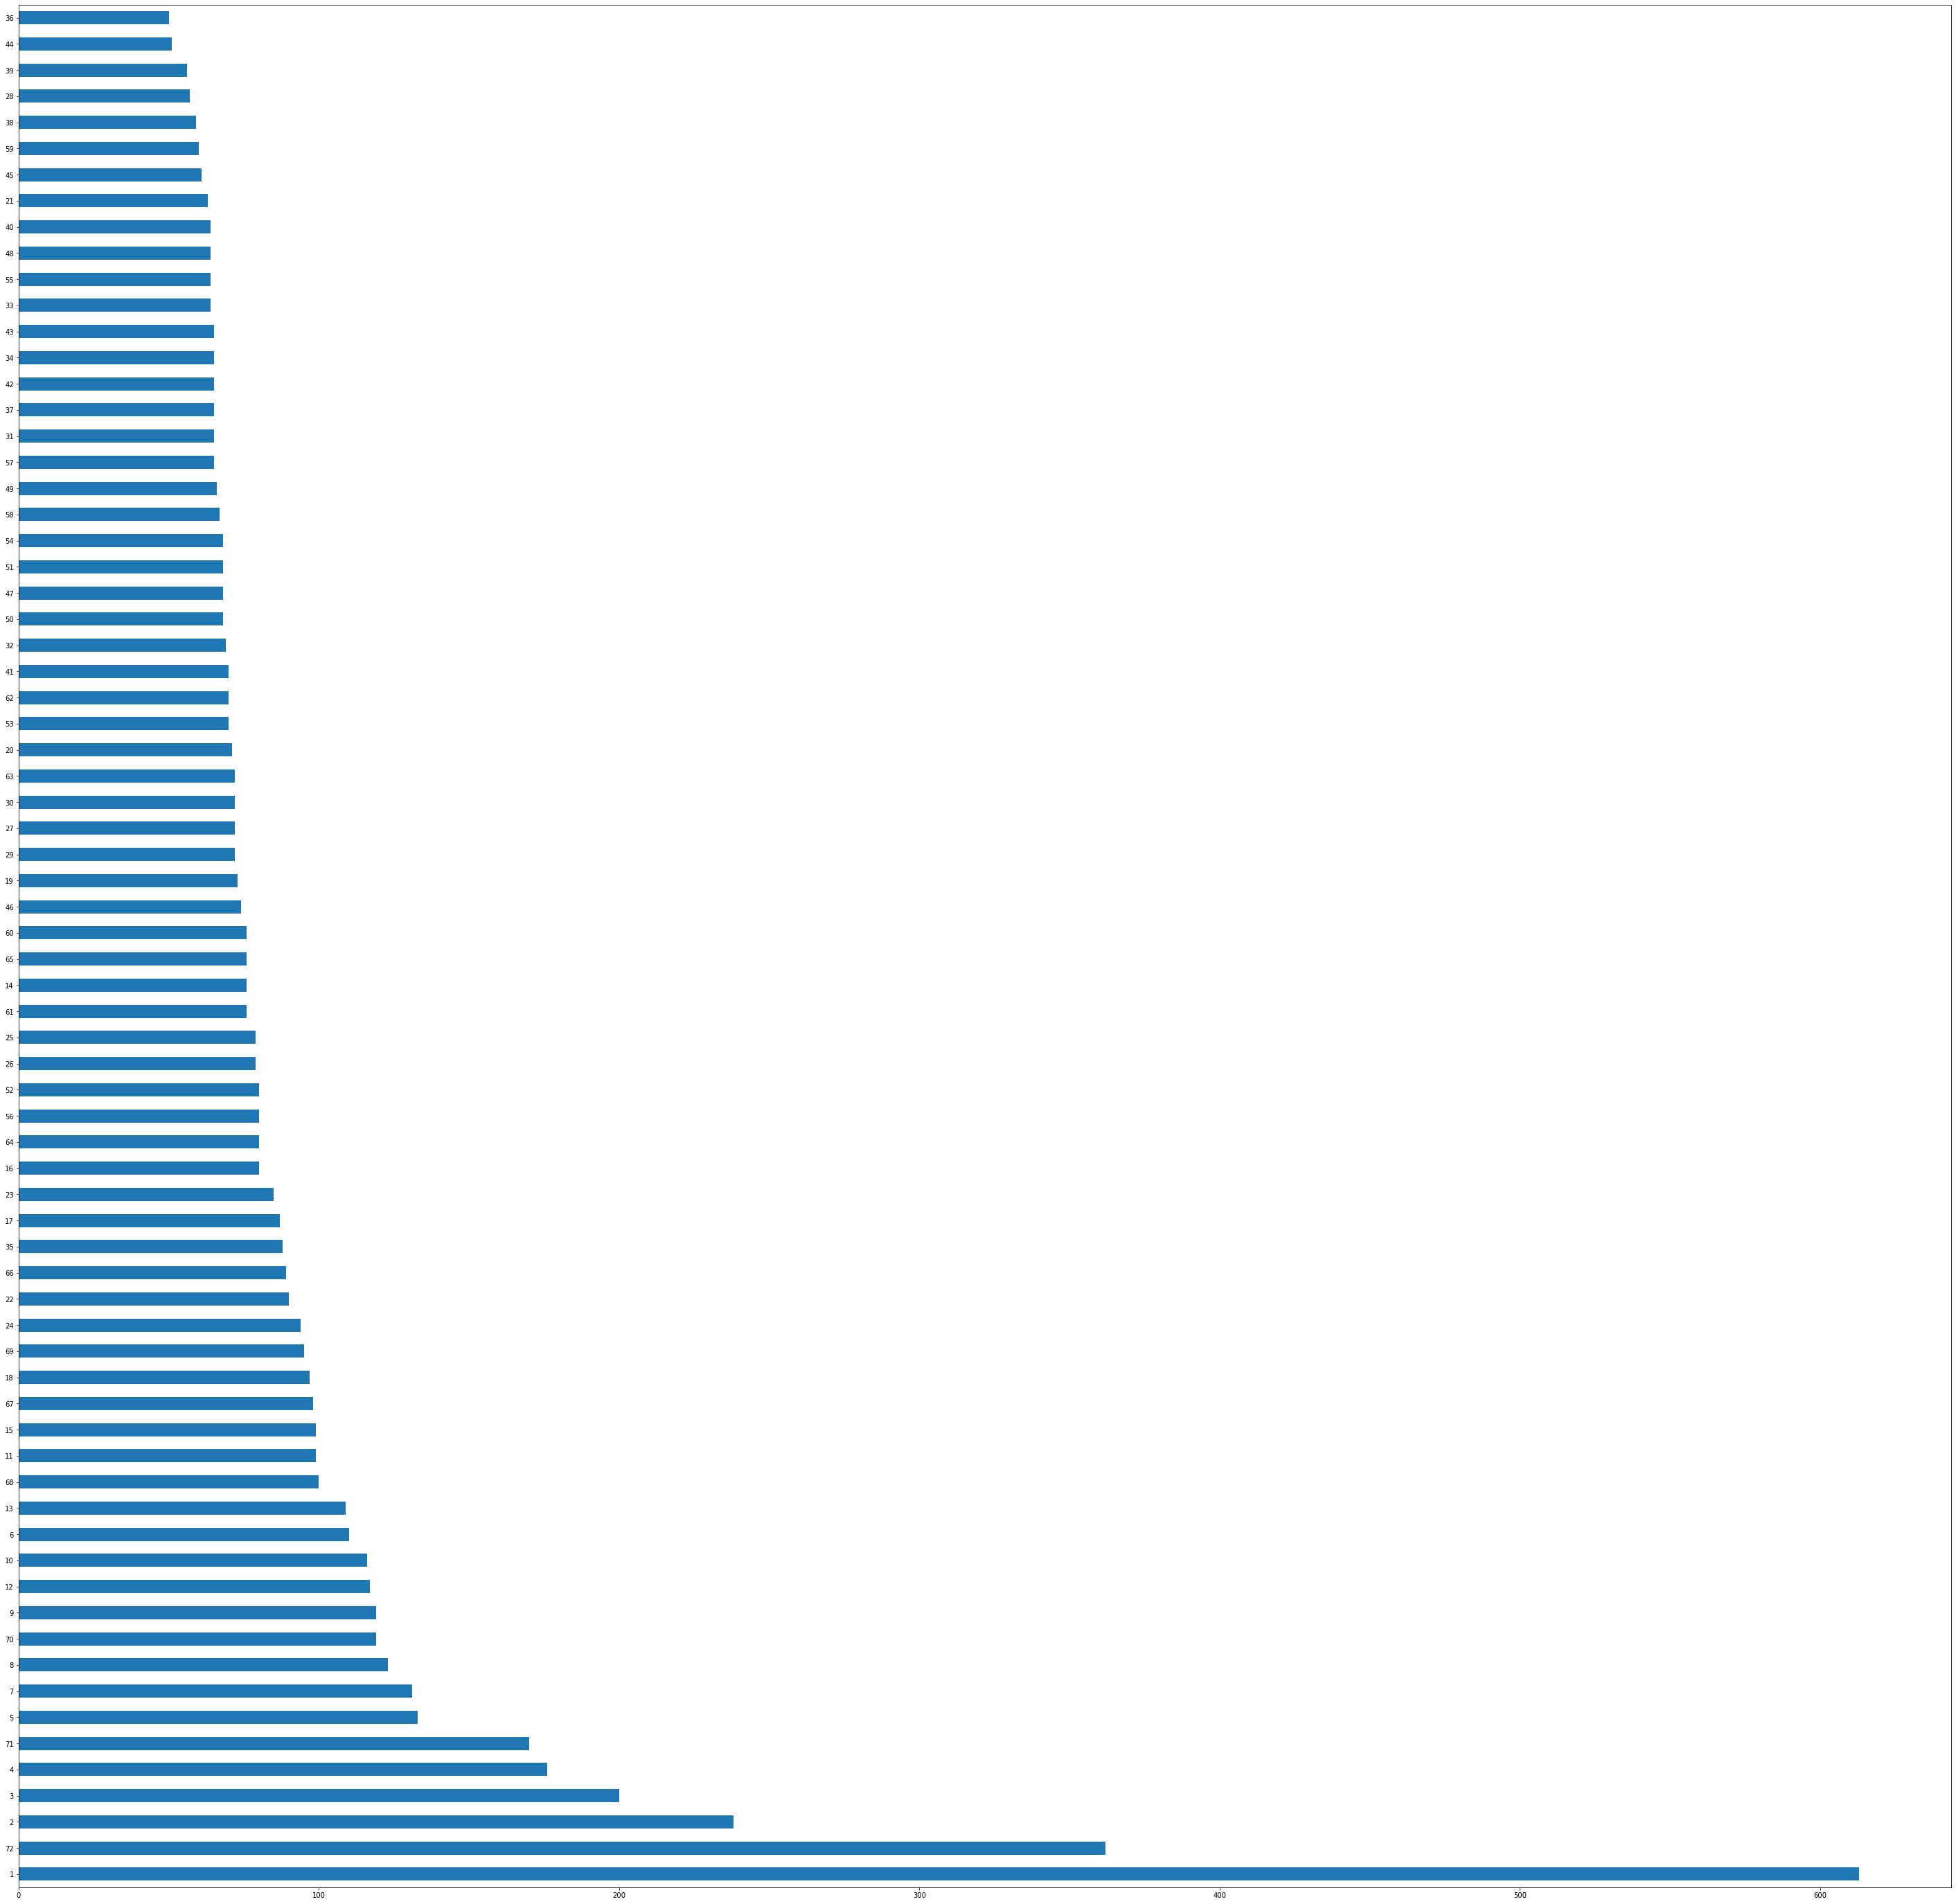

In [36]:
telco_data.tenure.value_counts().plot(kind='barh',figsize=(50,50))

#**5.** Divide customers into bins based on tenure e.g.for tenure<12: assign a tenure group
    if 1-12,for tenure between 1 to 2yrs,tenure group of 13-14;so on...

In [37]:
# Get the max tenure
print(telco_data['tenure'].max())   #72

72


In [38]:
# Group the tenure in bins of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group']=pd.cut(telco_data.tenure,range(1,80,12),right=False,labels=labels)
        

In [39]:
#write your own if-else blocks to create tenure bins

In [40]:
telco_data['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

<AxesSubplot:>

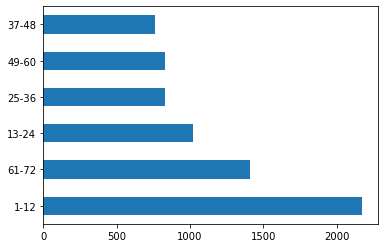

In [41]:
telco_data['tenure_group'].value_counts().plot(kind='barh')

<AxesSubplot:>

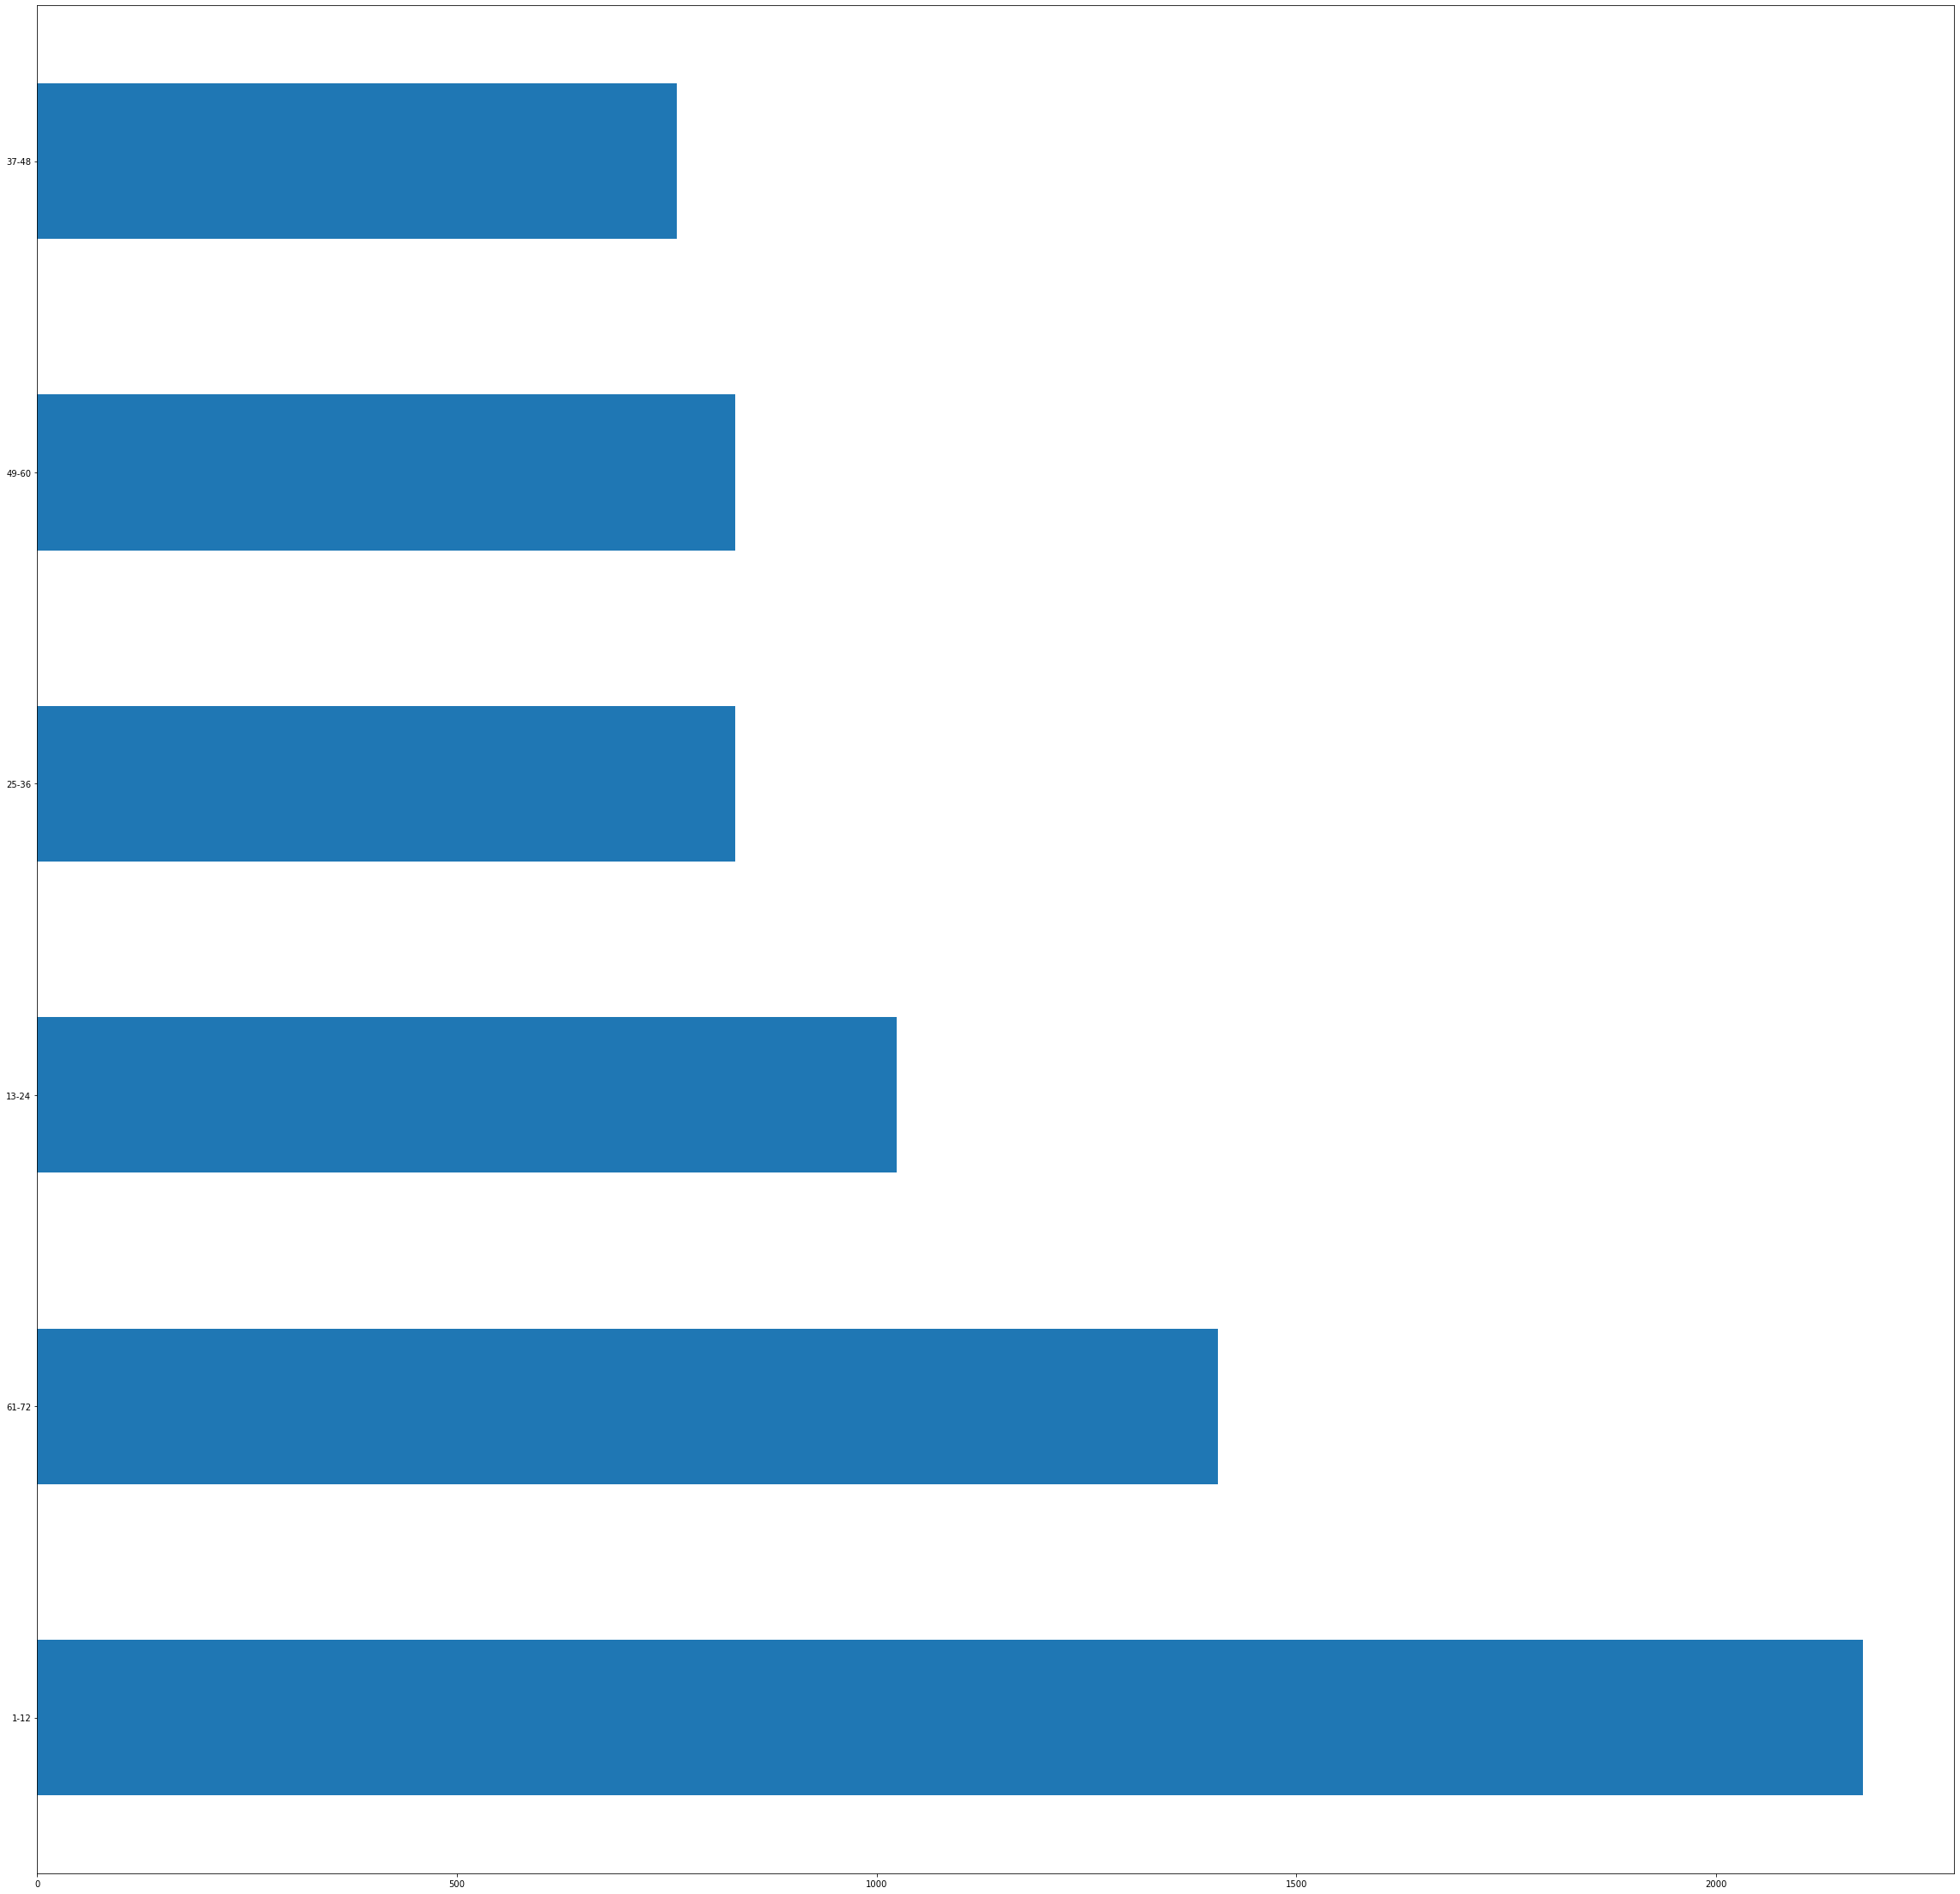

In [42]:
telco_data['tenure_group'].value_counts().plot(kind='barh',figsize=(40,40))

<AxesSubplot:>

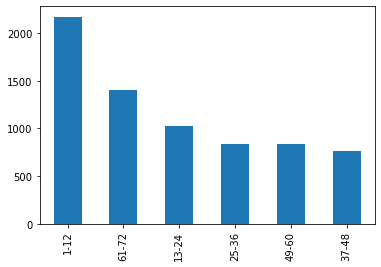

In [43]:
telco_data['tenure_group'].value_counts().plot(kind='bar')

In [45]:
telco_data.shape

(7032, 22)

In [46]:
telco_data.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

# 6.Remove columns not required for processing

In [47]:
# check the descriptive statistics of numeric variables
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration
*1.* plot distribution of individual predictors by churn.

<AxesSubplot:>

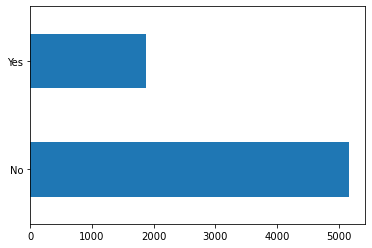

In [53]:
telco_data.Churn.value_counts().plot(kind='barh')

# Univariate Analysis

In [54]:
telco_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


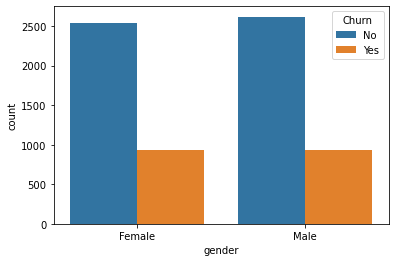

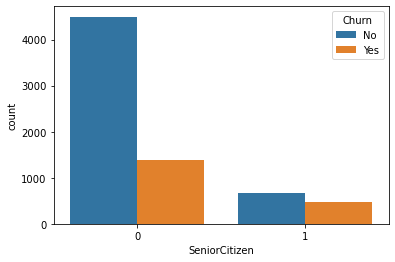

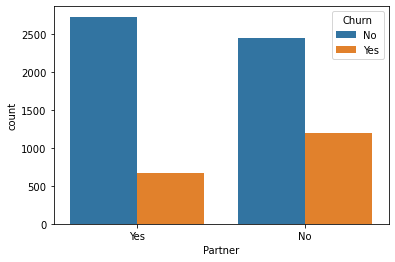

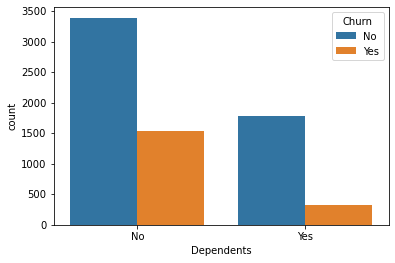

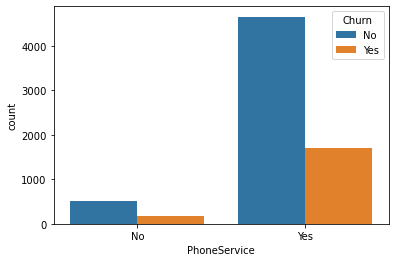

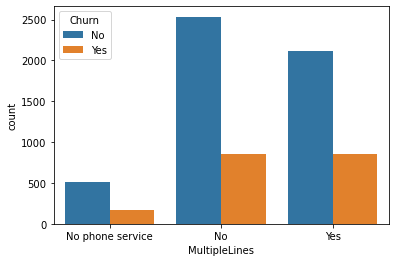

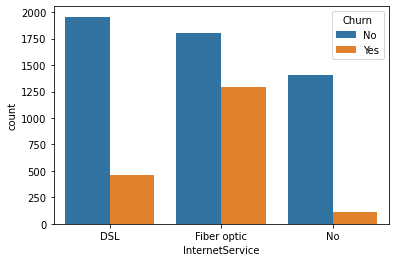

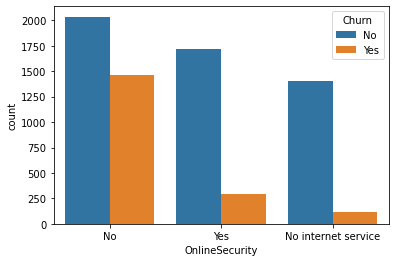

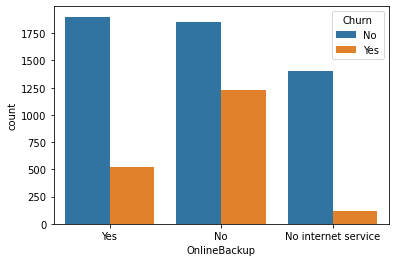

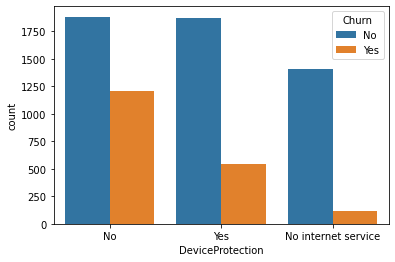

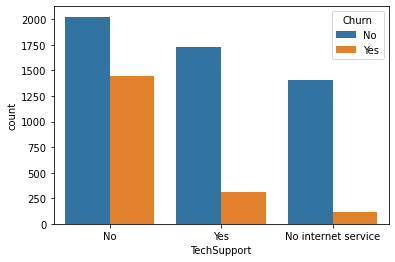

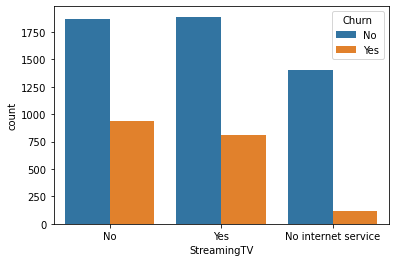

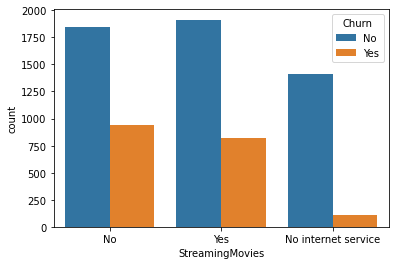

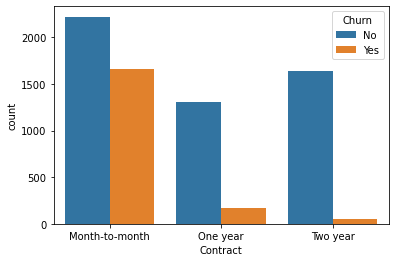

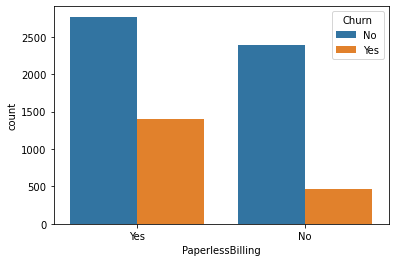

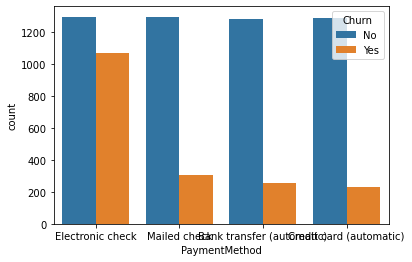

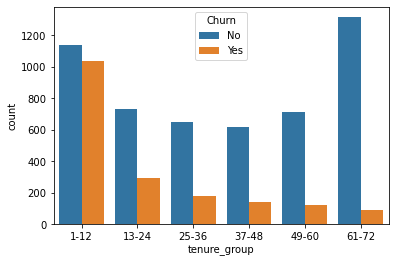

In [55]:
for i,predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data,x=predictor,hue='Churn')

In [58]:
telco_data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [60]:
100*telco_data.Churn.value_counts()/len(telco_data.Churn)

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

# 2.Convert the target variable 'Churn' in a binary numeric variable i.e Yes=1;No=0

In [61]:
telco_data['Churn']=np.where(telco_data.Churn=='Yes',1,0)

In [62]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


# 3.Convert all the categorical variables into dummy variables

In [63]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


# *9.*Relationship between  Monthaly Charges and Total Charges

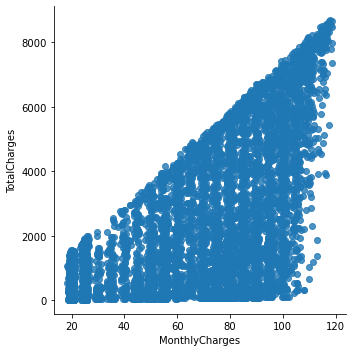

In [67]:
sns.lmplot(data=telco_data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

# Total Charges increases as Monthly Charges increse-as expected.

# 10.Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

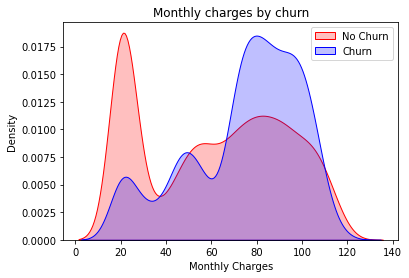

In [68]:
Mth=sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==0)],
                                                color="Red",shade=True)             
Mth=sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==1)],
               ax=Mth,color="Blue",shade=True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

# Insight:Churn is high when Monthly Chages ar high

Text(0.5, 1.0, 'Monthly charges by churn')

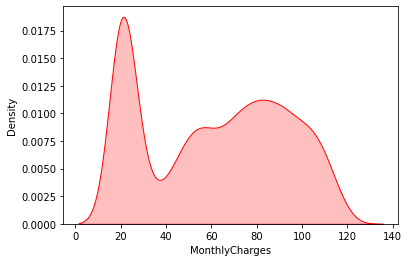

In [69]:
Tot=sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==0)],
                                                color="Red",shade=True)             
Tot=sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"]==1)],
               ax=Mth,color="Blue",shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Monthly Charges')
Tot.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total Charges by churn')

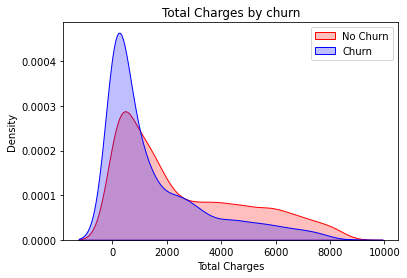

In [74]:
Tot=sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"]==0)],
              color="Red",shade=True)             
Tot=sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"]==1)],
               ax=Tot,color="Blue",shade=True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges by churn')

* Surprising insight*as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e.Tenure,Monthaly Charges then the picture is bit clear
:-Higher Monthly Charge at lower tenure results into lower Total Charge.
    
    Hence,all these 3 factors viz Higher Monthly Chare,Lowertenure and Lower Total Charge are linked to High Churn.

*11.Build a corelation of all predictors with 'Churn'*

In [76]:
telco_data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [77]:
telco_data_dummies.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.00000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441,0.265785,0.495307,0.504693,0.517491,0.482509,0.701507,0.298493,...,0.219283,0.216297,0.336320,0.228100,0.309300,0.14562,0.118316,0.108362,0.118316,0.200085
std,0.368844,30.085974,2266.771362,0.441782,0.500014,0.500014,0.499729,0.499729,0.457629,0.457629,...,0.413790,0.411748,0.472483,0.419637,0.462238,0.35275,0.323005,0.310859,0.323005,0.400092
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [80]:
telco_data_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [81]:
telco_data_dummies.head(51)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
5,0,99.65,820.50,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
6,0,89.10,1949.40,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
7,0,29.75,301.90,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
8,0,104.80,3046.05,1,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
9,0,56.15,3487.95,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [79]:
telco_data_dummies.corr()['Churn']

SeniorCitizen                              0.150541
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecurity_No                          0.342235
OnlineSecuri

In [82]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1-12                          0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:>

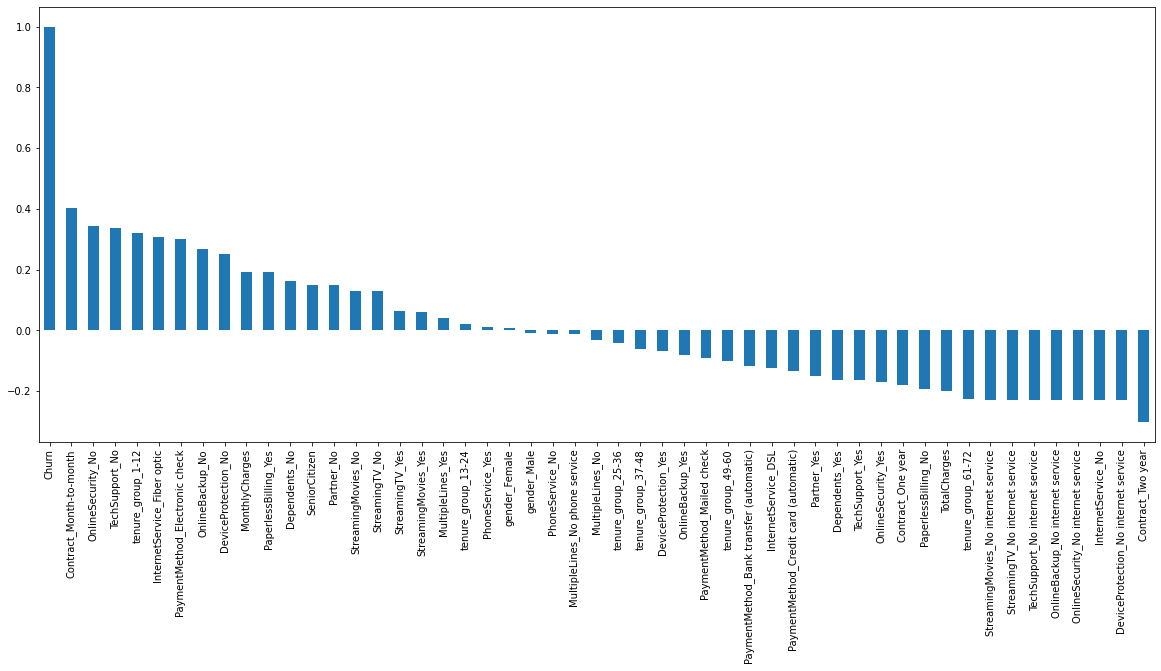

In [75]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# *Derived Insight:*
.HIGH Churn seen in case of Month to contracts,No online sequrity,No Tech support,First year of subscription and Fibre Optics Internet

.LOW Churn is seen in case of Long term contracts,Subscriptions without internet service and The customers
engaged for 5+ years

.Factors like Gender ,Availability of PhoneService and # of multiple lines have almost NO impact on Churn
.This is also evident from the Heatmap below.

In [85]:
telco_data_dummies.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
SeniorCitizen,1.000000,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219874,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.042410,0.030055,0.271117,-0.376568,-0.191881,-0.047220,0.009465,0.017614,0.070048,0.185440
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.592443,-0.210745,-0.047370,0.083696,0.252905,0.639312
Churn,0.150541,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.001819,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.001819,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,0.006249,-0.020658,-0.004319,0.016279
Partner_No,-0.016957,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.305061,0.048481,-0.003131,-0.035092,-0.105341,-0.280353
Partner_Yes,0.016957,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_No,0.210550,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.145379,0.001459,-0.009289,-0.023544,-0.031419,-0.118090
Dependents_Yes,-0.210550,-0.112343,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.052369,0.061134,-0.149274,0.056448,-0.145379,-0.001459,0.009289,0.023544,0.031419,0.118090


<AxesSubplot:>

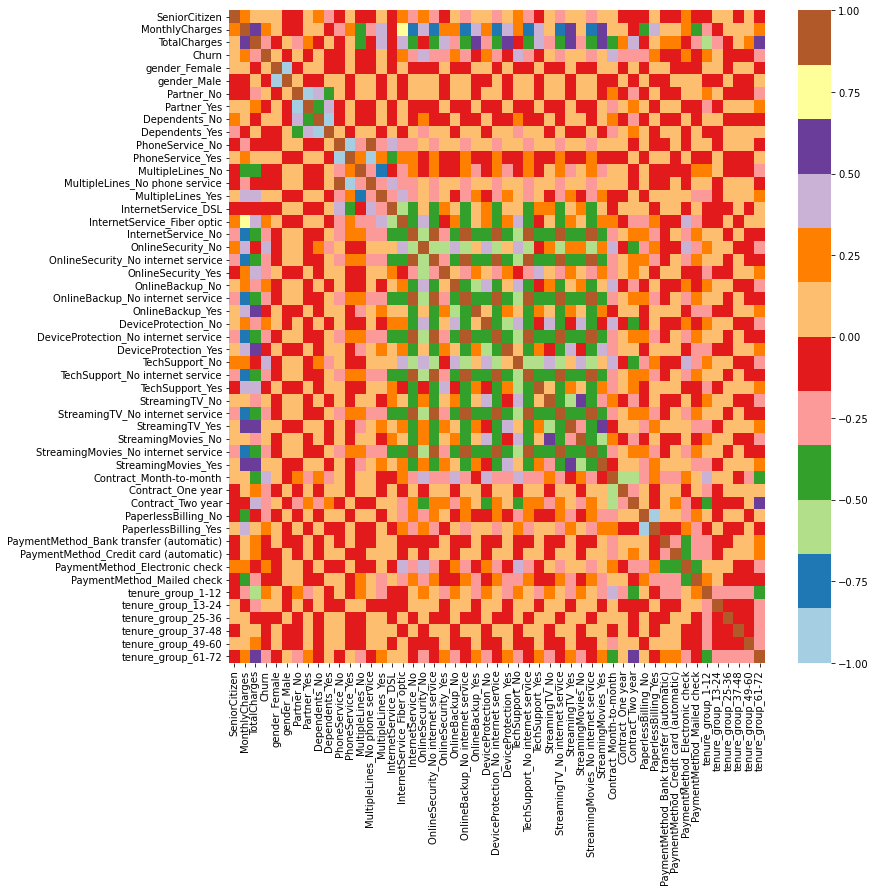

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(),cmap="Paired")

<AxesSubplot:>

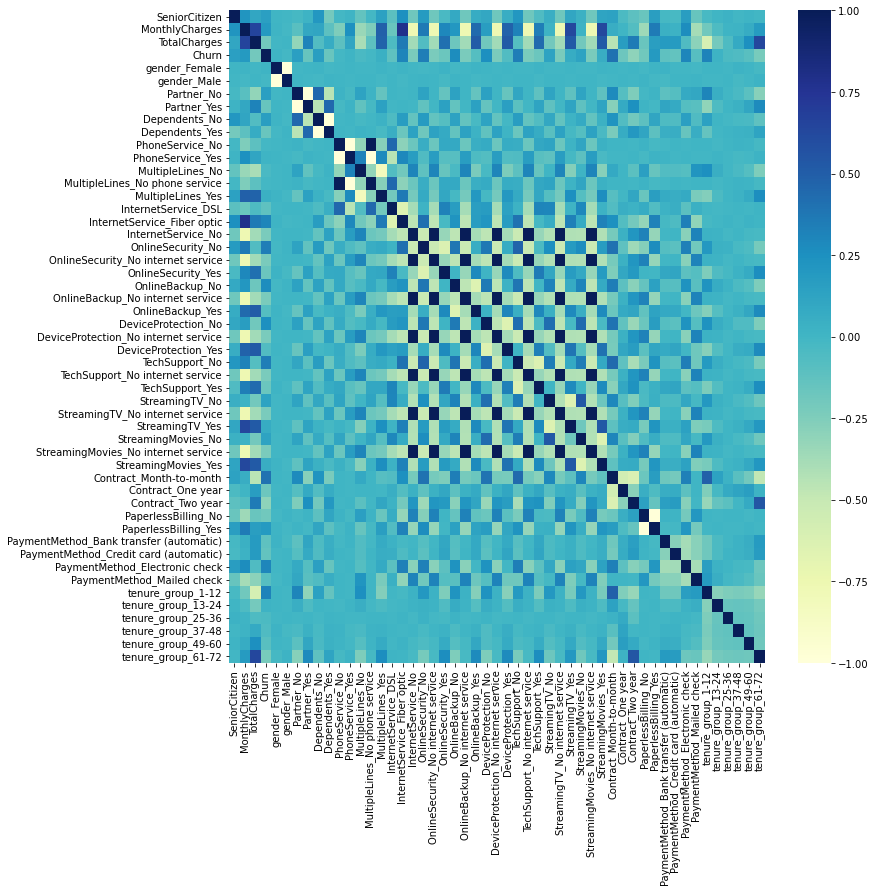

In [88]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(),cmap="YlGnBu")

# Bivariate Analysis

In [91]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [105]:
new_df1_target1.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1-12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25-36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49-60


In [106]:
len(new_df1_target0)

5163

In [107]:
len(new_df1_target1)

1869

In [108]:
telco_data.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [109]:
def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.labelsize"]=22
    plt.rcParams["axes.labelsize"]=30
    
    temp=pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

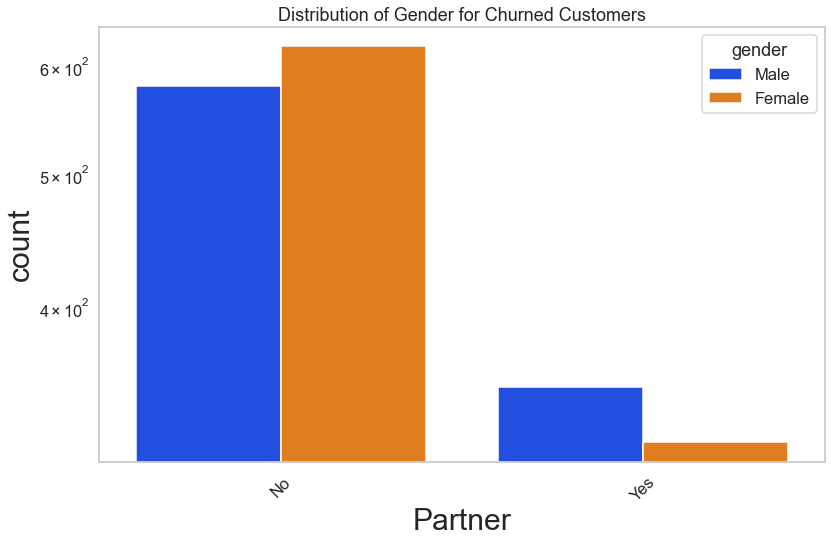

In [110]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

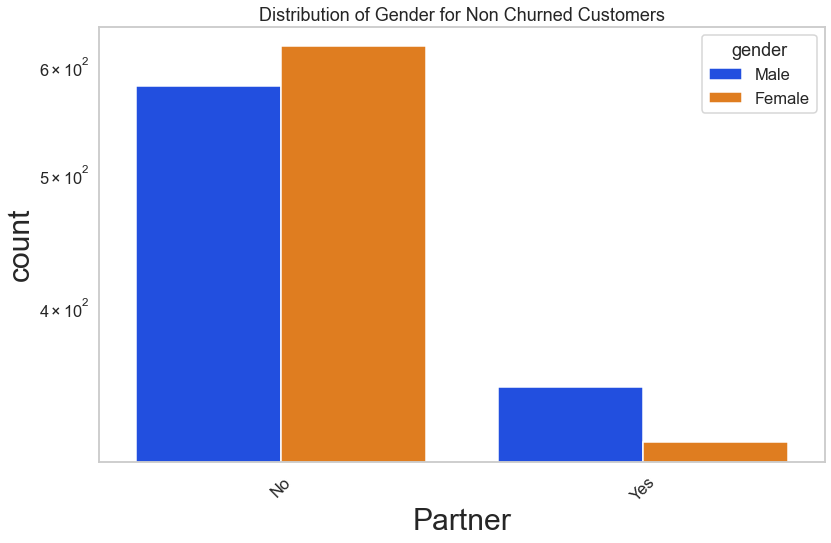

In [111]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

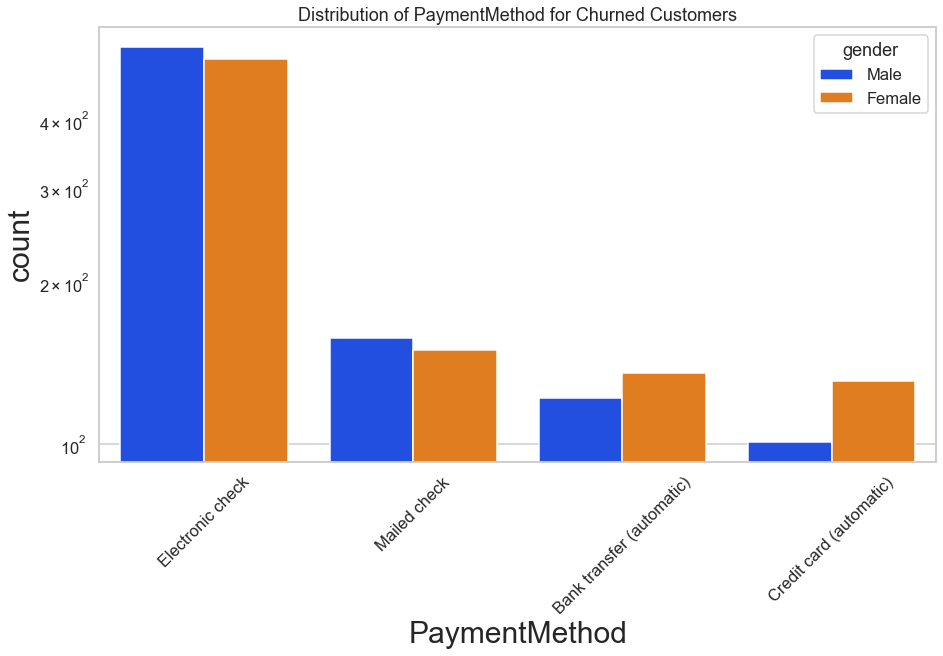

In [112]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

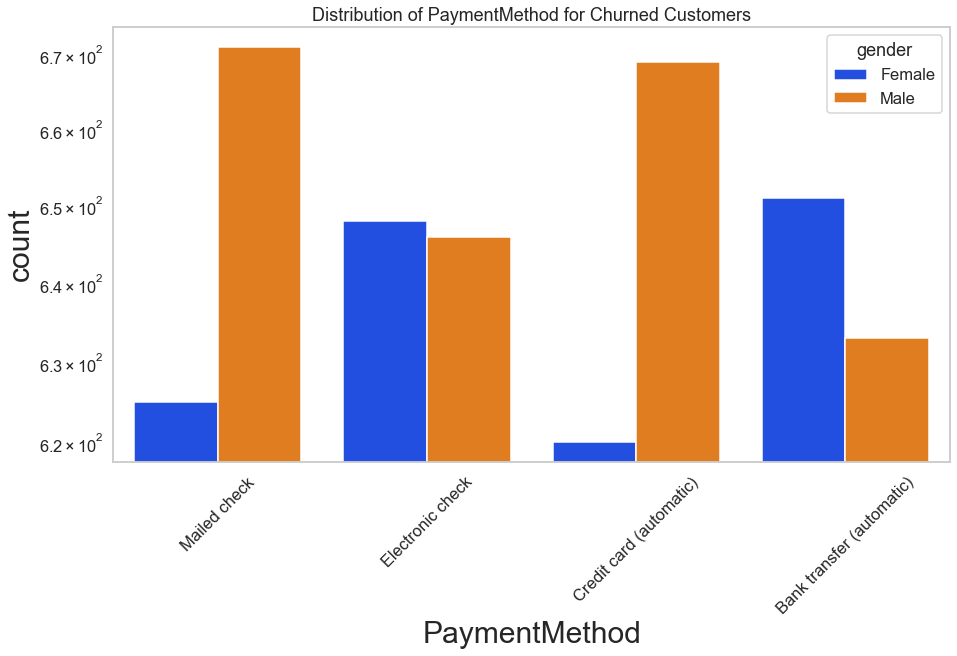

In [113]:
uniplot(new_df1_target0,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

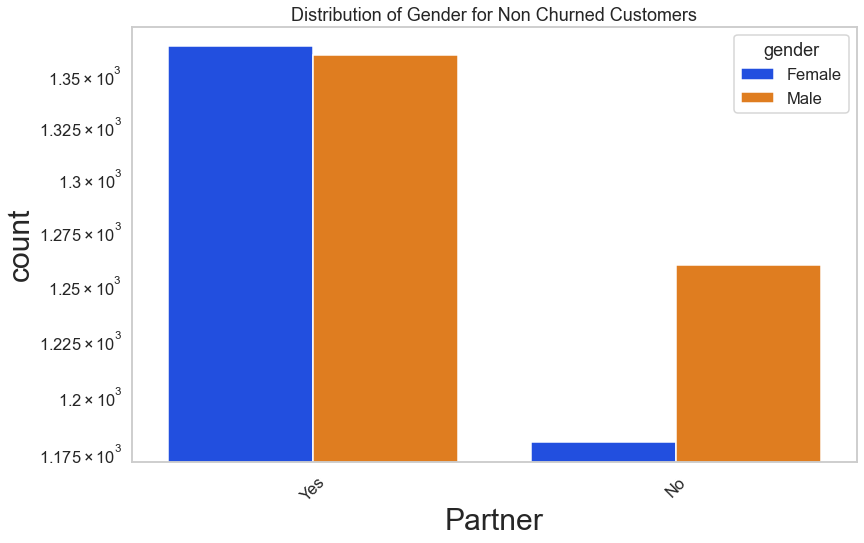

In [114]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

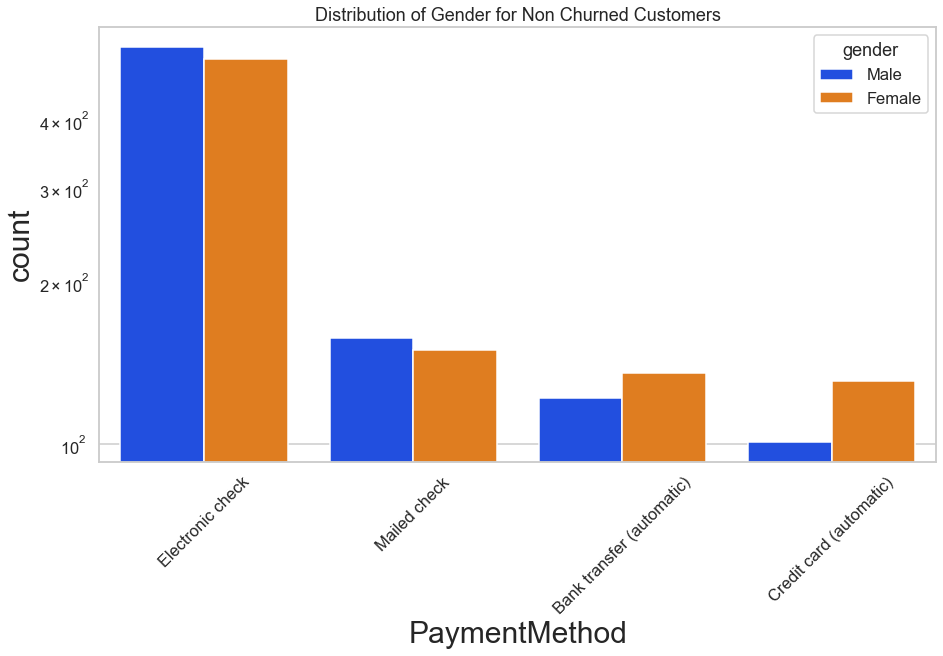

In [115]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Gender for Non Churned Customers',hue='gender')

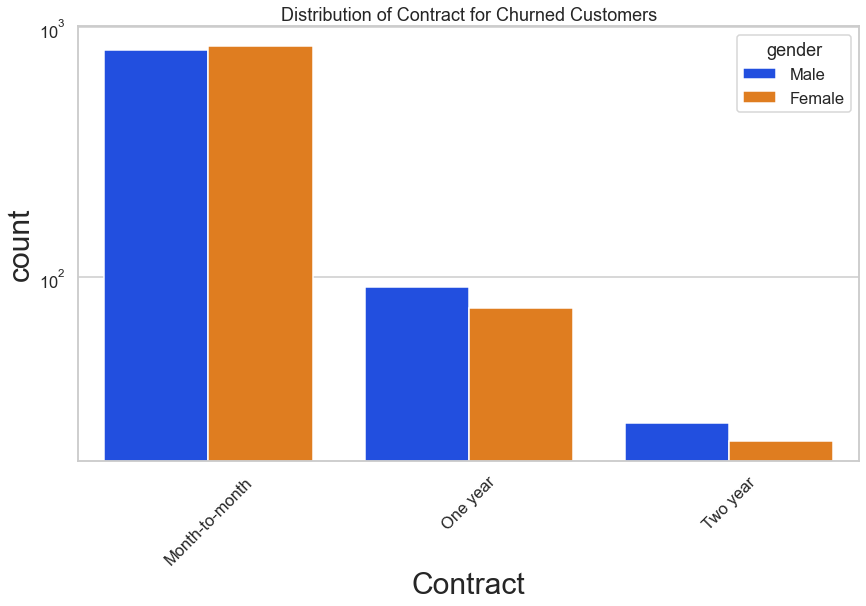

In [116]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

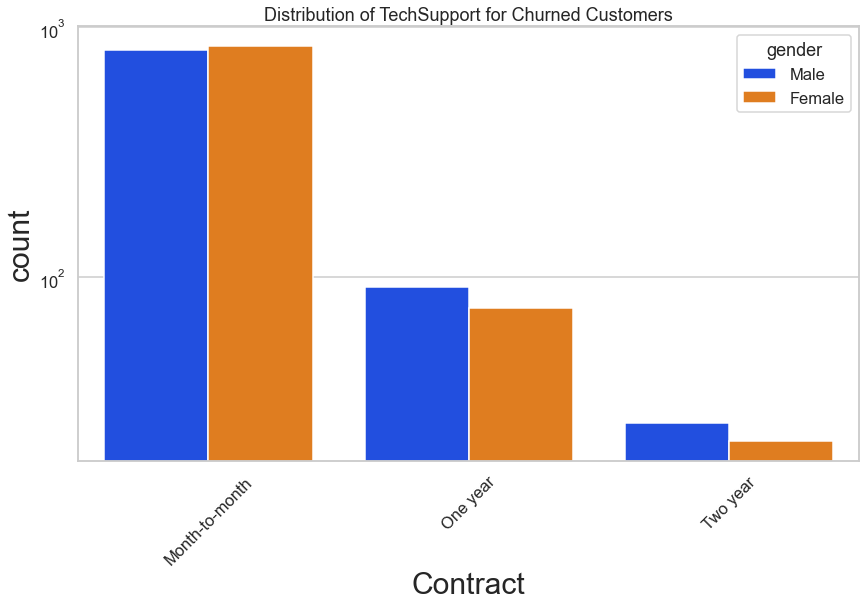

In [117]:
uniplot(new_df1_target1,col='Contract',title='Distribution of TechSupport for Churned Customers',hue='gender')

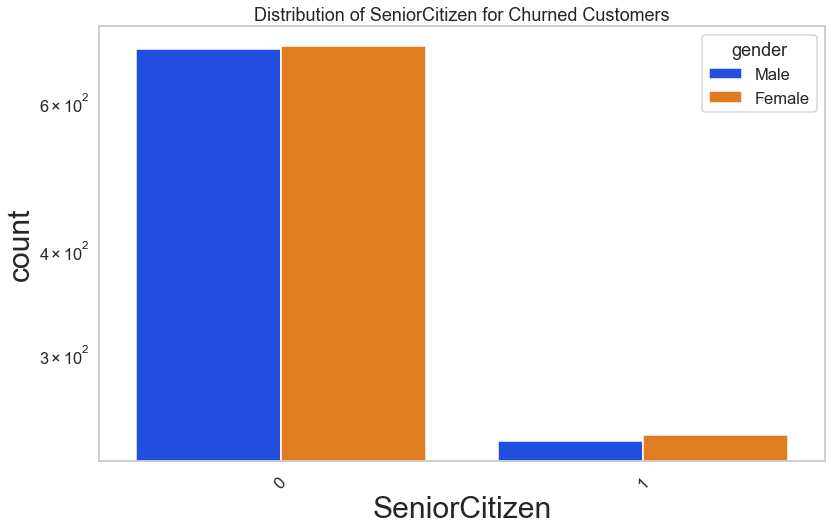

In [118]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

# These are some of the quick insights from this exercise:
1.Electronic check medium are the highest churners.

2.No Online security, No Tech Support category are high churners.

3.Contract Type-Monthly customers are more likely to churn because of no contract terms,as they are free to go customers.

4.Non senior Citizen are high churners.

Note:There could be many more such insights,so take this as an assignment and try to get more insights: